# **Accuracy and F1 score of ADS Solution**

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Load the data containing the ADS predictions into a dataframe

In [0]:
path = "./data/oof_model2_04.csv"
df = pd.read_csv(path)

### Generate target predictions with different thresholds

In [0]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for t in thresholds:
  df['PREDICTED_TARGET_'+str(t)] = np.where(df.PREDICTIONS > t, 1, 0)

df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,FLOORSMAX_MODE,APARTMENTS_MEDI,...,INS_12M_LIMIT_USE_MEAN,INS_24M_CNT_DRAWINGS_ATM_CURRENT_MEAN,INS_24M_SK_DPD_MAX,INS_24M_SK_DPD_SUM,INS_24M_AMT_BALANCE_MEAN,INS_24M_AMT_BALANCE_MAX,INS_24M_LIMIT_USE_MAX,INS_24M_LIMIT_USE_MEAN,INS_48M_CNT_DRAWINGS_ATM_CURRENT_MEAN,INS_48M_SK_DPD_MAX,INS_48M_SK_DPD_SUM,INS_48M_AMT_BALANCE_MEAN,INS_48M_AMT_BALANCE_MAX,INS_48M_LIMIT_USE_MAX,INS_48M_LIMIT_USE_MEAN,BUREAU_INCOME_CREDIT_RATIO,BUREAU_ACTIVE_CREDIT_TO_INCOME_RATIO,CURRENT_TO_APPROVED_CREDIT_MIN_RATIO,CURRENT_TO_APPROVED_CREDIT_MAX_RATIO,CURRENT_TO_APPROVED_CREDIT_MEAN_RATIO,CURRENT_TO_APPROVED_ANNUITY_MAX_RATIO,CURRENT_TO_APPROVED_ANNUITY_MEAN_RATIO,PAYMENT_MIN_TO_ANNUITY_RATIO,PAYMENT_MAX_TO_ANNUITY_RATIO,PAYMENT_MEAN_TO_ANNUITY_RATIO,CTA_CREDIT_TO_ANNUITY_MAX_RATIO,CTA_CREDIT_TO_ANNUITY_MEAN_RATIO,DAYS_DECISION_MEAN_TO_BIRTH,DAYS_CREDIT_MEAN_TO_BIRTH,DAYS_DECISION_MEAN_TO_EMPLOYED,DAYS_CREDIT_MEAN_TO_EMPLOYED,PREDICTIONS,PREDICTED_TARGET_0.1,PREDICTED_TARGET_0.2,PREDICTED_TARGET_0.3,PREDICTED_TARGET_0.4,PREDICTED_TARGET_0.5,PREDICTED_TARGET_0.6,PREDICTED_TARGET_0.7,PREDICTED_TARGET_0.8
0,0,100002,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,0,0.018800,-9461,-637.0,-3648.0,-2120,NaN,0,0,2,2,0,0,0,0,0,0.0830,0.2630,0.1394,0.0247,0.0690,0.0833,0.0190,0.0252,0.0833,0.0250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534,2.38,0.44040,0.4404,0.4404,0.3745,0.3745,0.374500,2.150,0.4680,1.175716,1.175716,0.06400,0.09240,0.951334,1.372057,0.268410,1,1,0,0,0,0,0,0
1,1,100003,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,1,1,1,1,0,0.003542,-16765,-1188.0,-1186.0,-291,NaN,0,1,1,1,1,0,0,0,1,0.3113,0.6220,NaN,0.0959,0.0345,0.2917,0.0549,0.0924,0.2917,0.0968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942,3.00,0.05260,0.8010,0.3743,2.7560,1.5840,0.186600,15.710,1.8130,0.290662,0.239484,0.07780,0.08356,1.098485,1.179082,0.010083,0,0,0,0,0,0,0,0
2,2,100004,0.0,1,0,1,67500.0,135000.0,6750.0,135000.0,0,0,0,0,0,0.010030,-19046,-225.0,-4260.0,-2531,26.0,1,0,2,2,1,0,0,0,2,NaN,0.5560,0.7295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400,NaN,0.14890,0.1489,0.1489,0.7935,0.7935,0.793500,1.566,1.0520,0.187652,0.187652,0.04280,0.04553,3.622222,3.853333,0.038449,0,0,0,0,0,0,0,0
3,3,100006,0.0,0,1,0,135000.0,312682.5,29686.5,297000.0,0,0,0,2,0,0.008020,-19005,-3040.0,-9830.0,-2437,NaN,0,0,2,2,0,0,0,0,0,NaN,0.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.07745,2.1580,1.1000,1.3460,0.7360,0.083600,23.300,2.1210,2.643133,1.497703,0.01819,NaN,0.113722,NaN,0.036422,0,0,0,0,0,0,0,0
4,4,100007,0.0,0,0,0,121500.0,513000.0,21865.5,513000.0,0,0,0,0,0,0.028660,-19932,-3038.0,-4310.0,-3458,NaN,0,1,2,2,2,0,0,1,3,NaN,0.3228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204,NaN,0.02849,0.5540,0.3250,1.0370,0.5615,0.000008,1.037,0.5586,0.931669,0.538926,0.06134,0.05765,0.402513,0.378209,0.069187,0,0,0,0,0,0,0,0


## Plot Confusion Matrices for different classificaton thresholds (1 is risk, 0 is no risk)

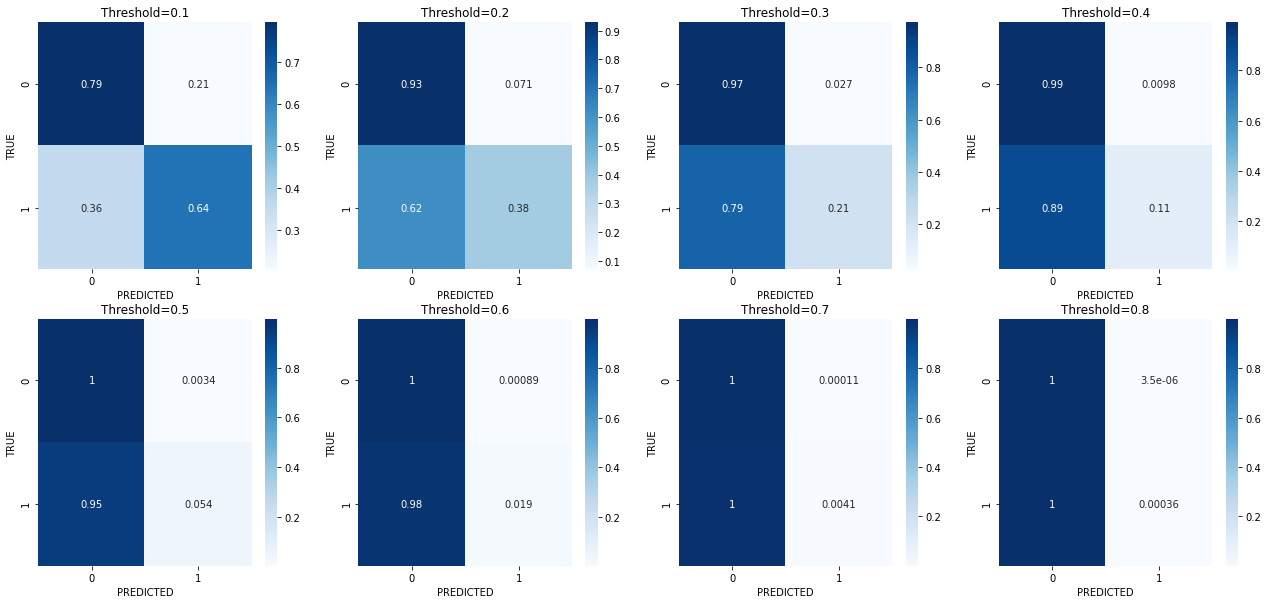

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

i, j = 0, 0

for t in thresholds:
  conf_m = confusion_matrix(df['TARGET'], df['PREDICTED_TARGET_'+str(t)], normalize='true')
  sns.heatmap(conf_m, cmap='Blues', annot=True, ax=axes[i][j])
  axes[i][j].set_title('Threshold='+str(t))
  axes[i][j].set_xlabel('PREDICTED')
  axes[i][j].set_ylabel('TRUE')
  j += 1
  if j==4:
    i += 1
    j = 0

## Accuracy and F1 Scores

In [0]:
# create subsets based on actual target value
sub_df0 = df[df['TARGET']==0]
sub_df1 = df[df['TARGET']==1]

In [0]:
df_scores = pd.DataFrame(np.zeros((8,4)), columns=['accuracy', 'accuracy_target_0', 'accuracy_target_1', 'f1_score'], index=thresholds)

for t in thresholds:
  df_scores.at[t, 'accuracy'] = accuracy_score(df['TARGET'], df['PREDICTED_TARGET_'+str(t)])
  df_scores.at[t, 'f1_score'] = f1_score(df['TARGET'], df['PREDICTED_TARGET_'+str(t)])
  df_scores.at[t, 'accuracy_target_0'] = accuracy_score(sub_df0['TARGET'], sub_df0['PREDICTED_TARGET_'+str(t)])
  df_scores.at[t, 'accuracy_target_1'] = accuracy_score(sub_df1['TARGET'], sub_df1['PREDICTED_TARGET_'+str(t)])

In [0]:
df_scores

,accuracy,accuracy_target_0,accuracy_target_1,f1_score
0.1,0.782710,0.794819,0.644820,0.323923
0.2,0.885101,0.929327,0.381486,0.348983
0.3,0.911803,0.973101,0.213785,0.281277
0.4,0.919325,0.990205,0.112190,0.183356
0.5,0.920460,0.996576,0.053698,0.098286
0.6,0.919985,0.999109,0.018974,0.036873
0.7,0.919507,0.999890,0.004149,0.008254
0.8,0.919299,0.999996,0.000363,0.000725


Text(0.5, 0, 'threshold')

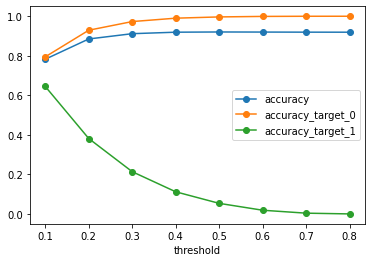

In [83]:
df_scores[['accuracy', 'accuracy_target_0', 'accuracy_target_1']].plot(kind='line', marker='o')
plt.xlabel('threshold')

Text(0.5, 0, 'threshold')

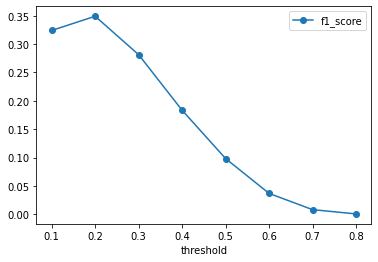

In [84]:
df_scores[['f1_score']].plot(kind='line', marker='o')
plt.xlabel('threshold')

Let us assume that the stakeholder choosing the threshold prioritizes
accuracy of no-risk cases more than that of risk cases since no-risk cases are potential customers and risk cases are very few in comparison. They also want to have a reasonable f1 score, and thus, 0.3 may seem like a good choice for threshold. For fairness analysis, we will use threshold 0.3.